In [1]:
from os import path

import torch
print(torch.__version__)
print(torch.cuda.is_available())
from torchvision import datasets, transforms
import pandas as pd
import numpy as np
from path import Path
import torch.utils.data as data

from torch import nn
import numpy as np
import pandas as pd
import tqdm

import os
import os
from sklearn.model_selection import train_test_split
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F


all_letters="ACTG"

1.0.1.post2
True


In [2]:
from torch import nn
import numpy as np
from torch import nn
from path import Path
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
import torch.nn.functional as F

In [3]:
import os
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
df=pd.DataFrame()
azz={}

In [5]:
def plot_roc(y_test,y_score,n_classes):
    
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    lb = LabelBinarizer()
    y_test=lb.fit_transform(y_test)
    
    y_test = np.hstack((1 - y_test, y_test))
    
#     y_test=lb.inverse_transform(y_test[:, 0])
#     print(y_test.shape)
#     print(y_test)    
#     print(y_test[:, 0])
#     print(y_score[:, 0])
#     print(y_score[:, 1])
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    plt.figure()
    lw = 2
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    azz['fpr']=fpr['macro']
    azz['tpr']=tpr['macro']
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    print(n_classes,"yes")
    for i, color in zip(range(n_classes), colors):
        print(i)
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('BiLSTM  FOR  PROSTATE  DATASET')
    plt.legend(loc="lower right")
    plt.show()

In [6]:
def letterToIndex(letter):
    return all_letters.find(letter)
def letterToTensor(letter):
  tensor=torch.zeros(1,4)
  tensor[0][letterToIndex(letter)] = 1
  return tensor
def lineToTensor(line):
  tensor=torch.zeros(len(line),1,4)
  for li,letters in enumerate(line):
    tensor[li][0][letterToIndex(letters)]=1
  return(tensor)

In [7]:
# lstm = nn.LSTM(input_size=4,hidden_size=100)  
# lstm=lstm.to(device)
# fc=nn.Linear(100,3).to(device)
# learning_rate = 0.05
# criterion = nn.NLLLoss().to(device)

In [8]:
File_object = open('Labels_prostate.txt',"r")
label_txt=File_object.readlines()

 
len(label_txt)

2424

In [9]:
 

genename=pd.read_csv('preprocessed_prostrate.csv')
u=genename['gen_name']

mapz=pd.read_csv('sequence.csv')
len(u)

2424

In [10]:
key=mapz['gene'].tolist()
sequence=mapz['sequence'].tolist()

dictionary = dict(zip(key, sequence))


In [11]:
def gene_preprocessing(text):
  g=""
  u=0
  for i in text:
    if  ord(i)<=90 and ord(i)>=65:
      g=g+i.lower()
    else:
      g=g+i
  return(g)
len(genename['gen_name'])
 

2424

In [12]:
loss_epoch=0
a=0
b=0
c=0
d=0
mint=99999999999999
maxt=-1
total_gene=[]
total_label=[]
for V in tqdm.tqdm(range(len(genename['gen_name']))):
    j=genename['gen_name'][V]
    GN=gene_preprocessing(j)
    #print(GN)
    lab=int(label_txt[V].replace('\n',''))
    #print(lab)
    if GN not in dictionary.keys():

        continue
#     print(GN)
    lin2TenGene=np.array(lineToTensor(dictionary[GN][:70]))
    if(lab==0):
#         if a>1000:
#             continue
        a=a+1
    elif lab==1:
#         if b>1000:
#             continue
        b=b+1
#     elif(lab==2):
# #         if c>1000:
# #             continue
#         c=c+1
#         total_gene.append(lin2TenGene)
#         total_label.append(lab)
#         total_gene.append(lin2TenGene)
#         total_label.append(lab)

    total_gene.append(lin2TenGene)
    cc=lineToTensor(dictionary[GN][:70])
#     print(cc)
#     print(cc[:,0,:].shape)
    total_label.append(lab)
    
    
print(a,b,c,d)



100%|██████████| 2424/2424 [00:03<00:00, 719.88it/s]

787 976 0 0


In [13]:
for V in tqdm.tqdm(range(len(genename['gen_name']))):
    j=genename['gen_name'][V]
    GN=gene_preprocessing(j)
    #print(GN)
    lab=int(label_txt[V].replace('\n',''))
    #print(lab)
    if GN not in dictionary.keys():

        continue
    mint=min (len(dictionary[GN][:50]),mint)
    maxt=max (len(dictionary[GN][:50]),maxt)
#     print(GN)
    lin2TenGene=np.array(lineToTensor(dictionary[GN][:70]))
    if(lab==0):
        
        if a>975:
            continue
        else:
            total_gene.append(lin2TenGene)
            total_label.append(lab)
            
            a=a+1
    elif lab==1:
        continue


    
print(a,b,c,d)
print(mint,maxt)

100%|██████████| 2424/2424 [00:01<00:00, 1667.74it/s]

976 976 0 0
50 50


In [14]:
print(len(total_gene))
print(len(total_label))

1952
1952


In [15]:
df = pd.DataFrame({'gen_name':total_gene,'gen_label':total_label})
df.to_csv('Prostrate_LSTM_traintest.csv')
print(len(df))        
df['gen_name'][0].shape

1952


(70, 1, 4)

In [16]:
class SequenceFolder(data.Dataset):
    def __init__(self,root):
        self.dataset=root
        
    
    def __len__(self):
#         print(len(self.dataset))
        return len(self.dataset)       

    def __getitem__(self, index):
         return (np.array(total_gene[index]) ,np.array(total_label[index]))
#         print(self.dataset['gen_name'][index])          
#         try:
           
#         except :
            
total_set=SequenceFolder(df)  
print(len(total_set))
u=0
for x in total_set:
    print(u)
#     print(x)
    u=u+1
    print("yes")
    

1952
0
yes
1
yes
2
yes
3
yes
4
yes
5
yes
6
yes
7
yes
8
yes
9
yes
10
yes
11
yes
12
yes
13
yes
14
yes
15
yes
16
yes
17
yes
18
yes
19
yes
20
yes
21
yes
22
yes
23
yes
24
yes
25
yes
26
yes
27
yes
28
yes
29
yes
30
yes
31
yes
32
yes
33
yes
34
yes
35
yes
36
yes
37
yes
38
yes
39
yes
40
yes
41
yes
42
yes
43
yes
44
yes
45
yes
46
yes
47
yes
48
yes
49
yes
50
yes
51
yes
52
yes
53
yes
54
yes
55
yes
56
yes
57
yes
58
yes
59
yes
60
yes
61
yes
62
yes
63
yes
64
yes
65
yes
66
yes
67
yes
68
yes
69
yes
70
yes
71
yes
72
yes
73
yes
74
yes
75
yes
76
yes
77
yes
78
yes
79
yes
80
yes
81
yes
82
yes
83
yes
84
yes
85
yes
86
yes
87
yes
88
yes
89
yes
90
yes
91
yes
92
yes
93
yes
94
yes
95
yes
96
yes
97
yes
98
yes
99
yes
100
yes
101
yes
102
yes
103
yes
104
yes
105
yes
106
yes
107
yes
108
yes
109
yes
110
yes
111
yes
112
yes
113
yes
114
yes
115
yes
116
yes
117
yes
118
yes
119
yes
120
yes
121
yes
122
yes
123
yes
124
yes
125
yes
126
yes
127
yes
128
yes
129
yes
130
yes
131
yes
132
yes
133
yes
134
yes
135
yes
136
yes
137
yes
1

1092
yes
1093
yes
1094
yes
1095
yes
1096
yes
1097
yes
1098
yes
1099
yes
1100
yes
1101
yes
1102
yes
1103
yes
1104
yes
1105
yes
1106
yes
1107
yes
1108
yes
1109
yes
1110
yes
1111
yes
1112
yes
1113
yes
1114
yes
1115
yes
1116
yes
1117
yes
1118
yes
1119
yes
1120
yes
1121
yes
1122
yes
1123
yes
1124
yes
1125
yes
1126
yes
1127
yes
1128
yes
1129
yes
1130
yes
1131
yes
1132
yes
1133
yes
1134
yes
1135
yes
1136
yes
1137
yes
1138
yes
1139
yes
1140
yes
1141
yes
1142
yes
1143
yes
1144
yes
1145
yes
1146
yes
1147
yes
1148
yes
1149
yes
1150
yes
1151
yes
1152
yes
1153
yes
1154
yes
1155
yes
1156
yes
1157
yes
1158
yes
1159
yes
1160
yes
1161
yes
1162
yes
1163
yes
1164
yes
1165
yes
1166
yes
1167
yes
1168
yes
1169
yes
1170
yes
1171
yes
1172
yes
1173
yes
1174
yes
1175
yes
1176
yes
1177
yes
1178
yes
1179
yes
1180
yes
1181
yes
1182
yes
1183
yes
1184
yes
1185
yes
1186
yes
1187
yes
1188
yes
1189
yes
1190
yes
1191
yes
1192
yes
1193
yes
1194
yes
1195
yes
1196
yes
1197
yes
1198
yes
1199
yes
1200
yes
1201
yes
1202
yes
1

In [17]:
batch_size = 4
validation_split = .2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
dataset_size = len(total_set)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(total_set, batch_size=batch_size, 
                                           sampler=train_sampler,drop_last=True)
validation_loader = torch.utils.data.DataLoader(total_set, batch_size=batch_size,
                                                sampler=valid_sampler,drop_last=True)


In [18]:
for x,y in validation_loader:
    print(x.shape)

torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([

In [19]:
lstm = nn.LSTM(input_size=4,hidden_size=200,bidirectional=True) #input_size hidden_size num_layers 
lstm2=nn.LSTM(input_size=400,hidden_size=100)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        
        self.fc1=nn.Linear(100, 500)
        
        self.relu=nn.ReLU(inplace=True)
        self.fc2=nn.Linear(500, 300)
        self.fc3=nn.Linear(300,100)
        self.bn1 = nn.BatchNorm1d(num_features=500)
        self.bn2 = nn.BatchNorm1d(num_features=300)
        self.bn3 = nn.BatchNorm1d(num_features=100)

        self.fc4=nn.Linear(100, 2)
        self.sigm=nn.Sigmoid()
        

    def forward(self, x):
        y=self.sigm(self.relu(self.fc4(self.bn3(self.relu(self.fc3(self.bn2(self.relu(self.fc2(self.bn1(self.relu(self.fc1(x))))))))))))
        return(y)
    


!nvidia-smi

Tue Jun 25 13:50:00 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:04:00.0  On |                  N/A |
|  0%   31C    P8    17W / 250W |   2083MiB / 11172MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:05:00.0 Off |                  N/A |
| 24%   44C    P2    56W / 250W |   4630MiB / 11172MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [20]:
device='cuda:0'
model1=lstm.to(device)
model2=MLP().to(device)
model3=lstm2.to(device)
criterion = nn.CrossEntropyLoss()
optim_params = [
    {'params': model1.parameters(), 'lr': 0.0001},
    {'params': model2.parameters(), 'lr':0.0001},
    {'params': model3.parameters(), 'lr':0.0001}
        
]
optimizer = torch.optim.Adam(optim_params)
model1.load_state_dict(torch.load(Path('59BiLSTMprostrateL1.pt')))
model2.load_state_dict(torch.load(Path('59BiLSTMprostrateL2.pt')))
model3.load_state_dict(torch.load(Path('59BiLSTMprostrateL3.pt')))


In [21]:
epoch=10000
#3, 50, 1, 4

In [22]:
total_correct=0
total=0
confusion_matrix = torch.zeros(2, 2)
y_test=[]
y_score=[]

for GN,lab in (validation_loader):
    #gen_nam=GN[0]

    seq=GN
    seq=seq[:,:,0,:].permute(1,0,2)



    lab=lab.to(device)
    inp=seq.to(device)

    if inp.shape[1]==2:
        continue


    h0 = torch.zeros(2, 4, 200).to(device)   #(num_layers * num_directions, batch, hidden_size)
    c0 = torch.zeros(2, 4, 200).to(device)
    h_x2=c_x2=torch.zeros(1, 4, 100).to(device)
    output, (hn, cn) = model1(inp, (h0, c0))  
    output,(_,_)=model3(output,(h_x2,c_x2))
   # print(output.shape)
    q1,q2,q3=output.shape
    out_last=((output[q1-1]))
    

    After_fc=model2(out_last)
    y_score.append(After_fc)
    y_test.append(lab)
    print(After_fc.shape,lab.shape)

    _, preds = torch.max(After_fc, 1)
    total_correct=total_correct+torch.sum(preds.long()==lab.long().to(device))
    total=total+4

    for t, p in zip(lab.view(-1), preds.view(-1)):

        confusion_matrix[t.long(), p.long()] += 1
print(total_correct,total)
print(confusion_matrix)


torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) torch.Size([4])
torch.Size([4, 2]) t

In [23]:
y_testI=torch.cat(y_test,0)#1
y_scoreI=torch.cat(y_score,0)#2
print(y_testI.shape,y_scoreI.shape)

torch.Size([388]) torch.Size([388, 2])


2 yes
0
1


<Figure size 432x288 with 0 Axes>

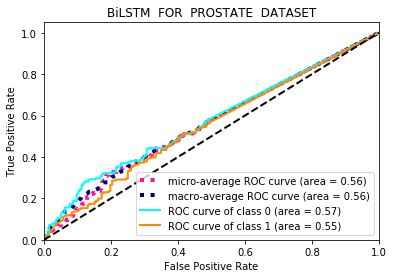

In [24]:
plot_roc(y_testI.cpu().numpy(),y_scoreI.detach().cpu().numpy(),2)

In [25]:

dataset = pd.DataFrame({'fpr':azz['fpr'],'tpr':azz['tpr']})

In [26]:
dataset.to_csv('prostrate_lstm_roc.csv')